In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Get the Data

In [2]:
test = pd.read_csv("titanic/test.csv")
train = pd.read_csv("titanic/train.csv")
gender_submission = pd.read_csv("titanic/gender_submission.csv")


# Data Analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data visulization

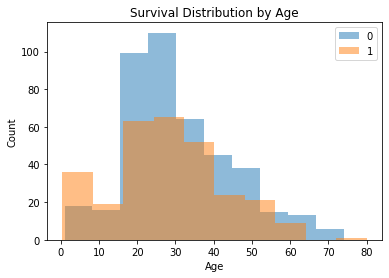

In [5]:
plt.hist(train[train["Survived"] == 0]["Age"], alpha = .5, label = "0")
plt.hist(train[train["Survived"] == 1]["Age"], alpha = .5, label = "1")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Survival Distribution by Age")
plt.legend();

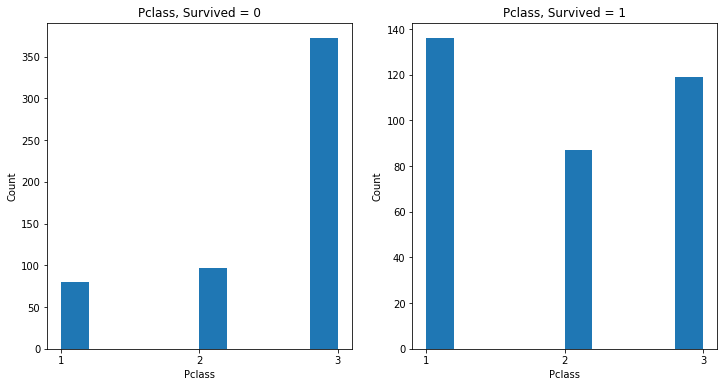

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(train[train["Survived"] == 0]["Pclass"])
plt.xticks([1,2,3])
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass, Survived = 0")

plt.subplot(1,2,2)
plt.hist(train[train["Survived"] == 1]["Pclass"])
plt.xticks([1,2,3])
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass, Survived = 1");

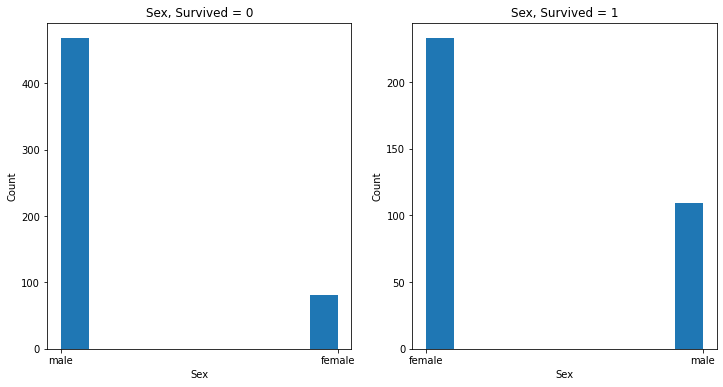

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(train[train["Survived"] == 0]["Sex"])

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex, Survived = 0")

plt.subplot(1,2,2)
plt.hist(train[train["Survived"] == 1]["Sex"])

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex, Survived = 1");

# Data preprocessing

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

train = train.fillna(0)
test = test.fillna(0)

trainX = train[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
trainY = train["Survived"]

testX = test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
testY = gender_submission["Survived"][test.index]

le = preprocessing.LabelEncoder()
trainX = trainX.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
testX = testX.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

scaler= StandardScaler()
scaler.fit(trainX)
trainX=scaler.transform(trainX)

scaler2= StandardScaler()
scaler2.fit(testX)
testX=scaler.transform(testX)



# Inital Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(trainX, trainY)
clf.score(testX,testY)

0.8325358851674641

# Model optimization

In [14]:
score = []
for i in range(1,25):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(trainX, trainY)
    score.append(clf.score(testX,testY))

Best Accuracy = 0.992822966507177, At depth = 2


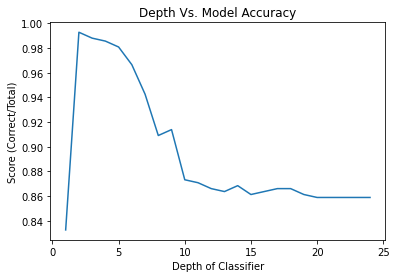

In [15]:
depth = np.arange(1,25,1)
plt.plot(depth,score)
plt.xlabel("Depth of Classifier")
plt.ylabel("Score (Correct/Total)")
plt.title("Depth Vs. Model Accuracy");
print("Best Accuracy = " + str(max(score)) + ", At depth = " + str(depth[score.index(max(score))]))